# Generalized Linear Models

We shall start with sample OLS model. Then we ll apply 

- GLM: Gamma for proportional count  
- GLM: Binomial


# 1)- Importing key libraries 

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [2]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# What's life without style :). So, let's add style to our dataframes
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas, numpy, seaborn, matplotlib, sys,h2o

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.18362 SP0
pandas 0.24.1
numpy 1.16.0
seaborn 0.9.0
matplotlib 3.0.2
sys The 'sys' distribution was not found and is required by the application
h2o 3.26.0.3
Sun Aug 25 11:12:38 2019 W. Europe Daylight Time

# 2)- Loading data

In [7]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [8]:
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


Lottery being our dependant variable

# 3)- Exploring data

### 3.1)- Data type

In [9]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
dept,int64
Prostitutes,int64
Instruction,int64
Desertion,int64
Lottery,int64
Donation_clergy,int64
Infanticide,int64
Crime_parents,int64
Clergy,int64
Area,int64


### 3.2)-Checking categorical variables

In [10]:
# Checking unique categorical variables
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Region         5
Department    86
MainCity       3
dtype: int64

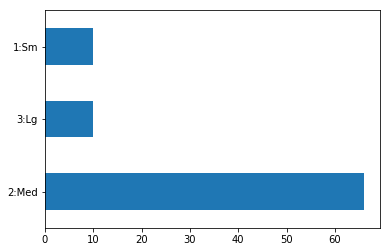

In [11]:
df.MainCity.value_counts().plot(kind='barh')

### 3.3)-Data Description

In [12]:
df.describe()

,dept,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,46.883721,19754.406977,7843.058140,39.255814,7075.546512,19049.906977,36522.604651,43.500000,42.802326,43.430233,43.500000,43.511628,43.500000,43.500000,43.500000,43.127907,141.872093,207.953140,6146.988372,378.628721
std,30.426157,7504.703073,3051.352839,17.364051,5834.595216,8820.233546,31312.532649,24.969982,25.028370,24.999549,24.969982,24.948297,24.969982,24.969982,24.969982,24.799809,520.969318,109.320837,1398.246620,148.777230
min,1.000000,2199.000000,1368.000000,12.000000,1246.000000,2660.000000,3460.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,762.000000,129.100000
25%,24.250000,14156.250000,5933.000000,25.000000,3446.750000,14299.750000,15463.000000,22.250000,21.250000,22.250000,22.250000,22.250000,22.250000,22.250000,22.250000,23.250000,6.000000,121.383000,5400.750000,283.005000
50%,45.500000,18748.500000,7595.000000,38.000000,5020.000000,17141.500000,26743.500000,43.500000,42.500000,43.500000,43.500000,43.500000,43.500000,43.500000,43.500000,41.500000,33.000000,200.616000,6070.500000,346.165000
75%,66.750000,25937.500000,9182.250000,51.750000,9446.750000,22682.250000,44057.500000,64.750000,63.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,113.750000,289.670500,6816.500000,444.407500
max,200.000000,37014.000000,20235.000000,74.000000,37015.000000,62486.000000,163241.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,4744.000000,539.213000,10000.000000,989.940000


### 3.4)-Sorting

In [13]:
df.sort_values(by='Lottery', ascending=False).head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
45,48,S,Lozere,7710,5990,27,2040,25157,11092,1:Sm,...,72,45,42,86,5,60,0,283.810,5167,140.35
20,23,C,Creuse,37014,20235,23,10997,14363,77823,1:Sm,...,75,24,75,85,4,71,12,180.846,5565,265.38
17,19,C,Correze,15262,12949,12,14993,19330,47480,2:Med,...,86,16,82,84,2,86,3,227.899,5857,294.83
85,200,NaN,Corse,2199,4589,49,37015,24743,37016,2:Med,...,81,2,84,83,9,25,1,539.213,8680,195.41
13,15,C,Cantal,18070,11645,31,4093,15335,87338,2:Med,...,79,83,66,82,1,51,20,245.849,5726,258.59


In [14]:
df.sort_values(by=['Lottery', 'Literacy'], ascending=[True, False]).head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
70,75,N,Seine,13945,1368,71,4204,2660,3632,3:Lg,...,60,67,53,1,33,6,4744,0.000,762,935.11
66,69,E,Rhone,18793,4504,45,1983,3910,17003,3:Lg,...,37,33,21,2,14,31,104,213.032,3249,434.43
11,13,S,Bouches-du-Rhone,13409,5291,38,2314,9325,8107,3:Lg,...,45,74,55,3,23,43,25,362.568,5087,359.47
30,33,W,Gironde,24096,7423,40,5076,10676,19220,3:Lg,...,27,80,48,4,13,41,39,291.624,10000,554.23
64,67,E,Bas-Rhin,12309,4920,62,14472,14356,18623,3:Lg,...,23,48,51,5,53,12,101,217.752,4755,540.21


### 3.5)- Correlation

In [15]:
data_corrs = df.corr()

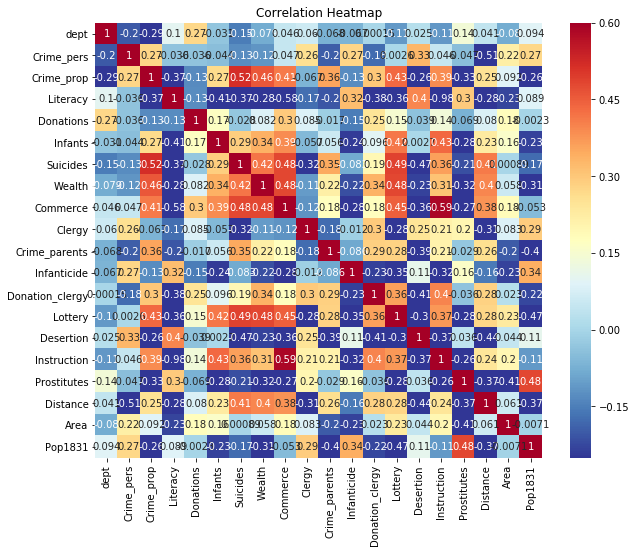

In [16]:
plt.figure(figsize = (10, 8))

# Heatmap of correlations
sns.heatmap(data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

### 3.6)- Histogram

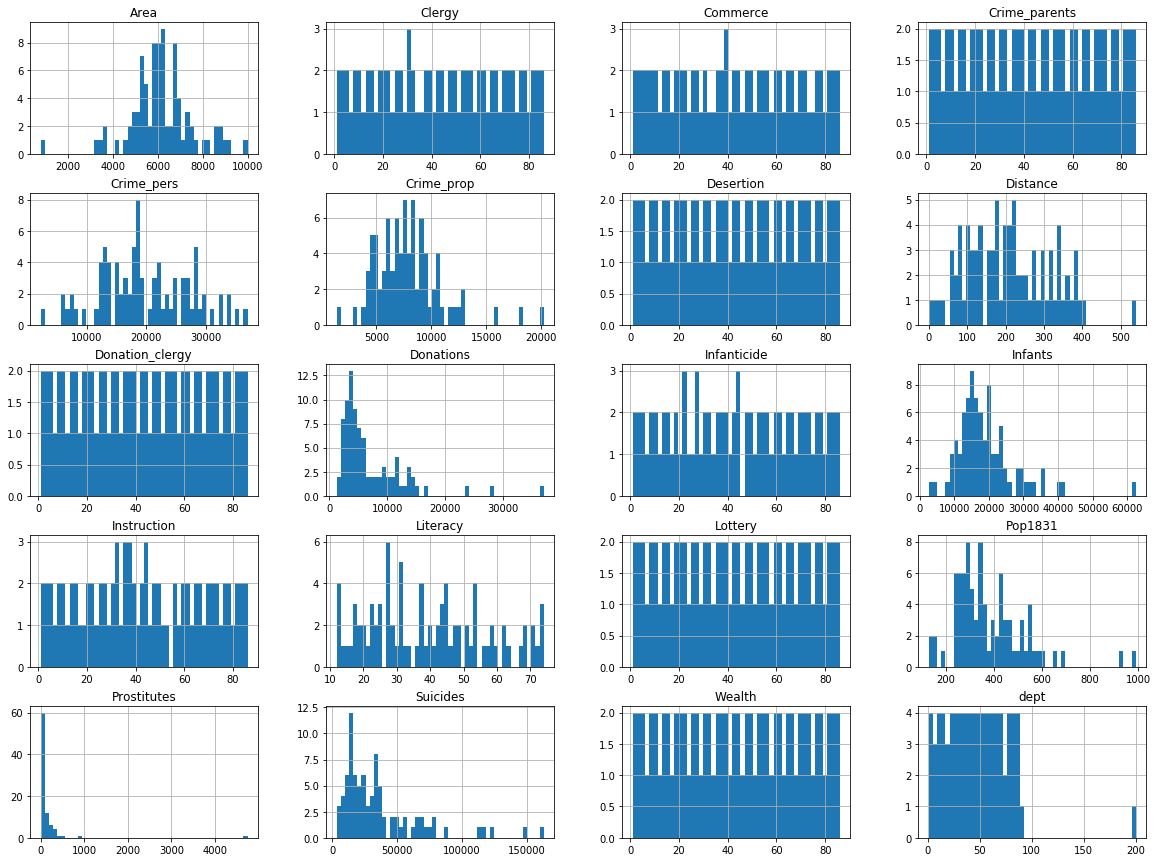

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### 3.6)- Missing values

In [18]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [19]:
missing_values = find_missing_values(df, columns=df.columns)
missing_values

Number of missing or NaN values for each column:


{'dept': 0,
 'Region': 1,
 'Department': 0,
 'Crime_pers': 0,
 'Crime_prop': 0,
 'Literacy': 0,
 'Donations': 0,
 'Infants': 0,
 'Suicides': 0,
 'MainCity': 0,
 'Wealth': 0,
 'Commerce': 0,
 'Clergy': 0,
 'Crime_parents': 0,
 'Infanticide': 0,
 'Donation_clergy': 0,
 'Lottery': 0,
 'Desertion': 0,
 'Instruction': 0,
 'Prostitutes': 0,
 'Distance': 0,
 'Area': 0,
 'Pop1831': 0}

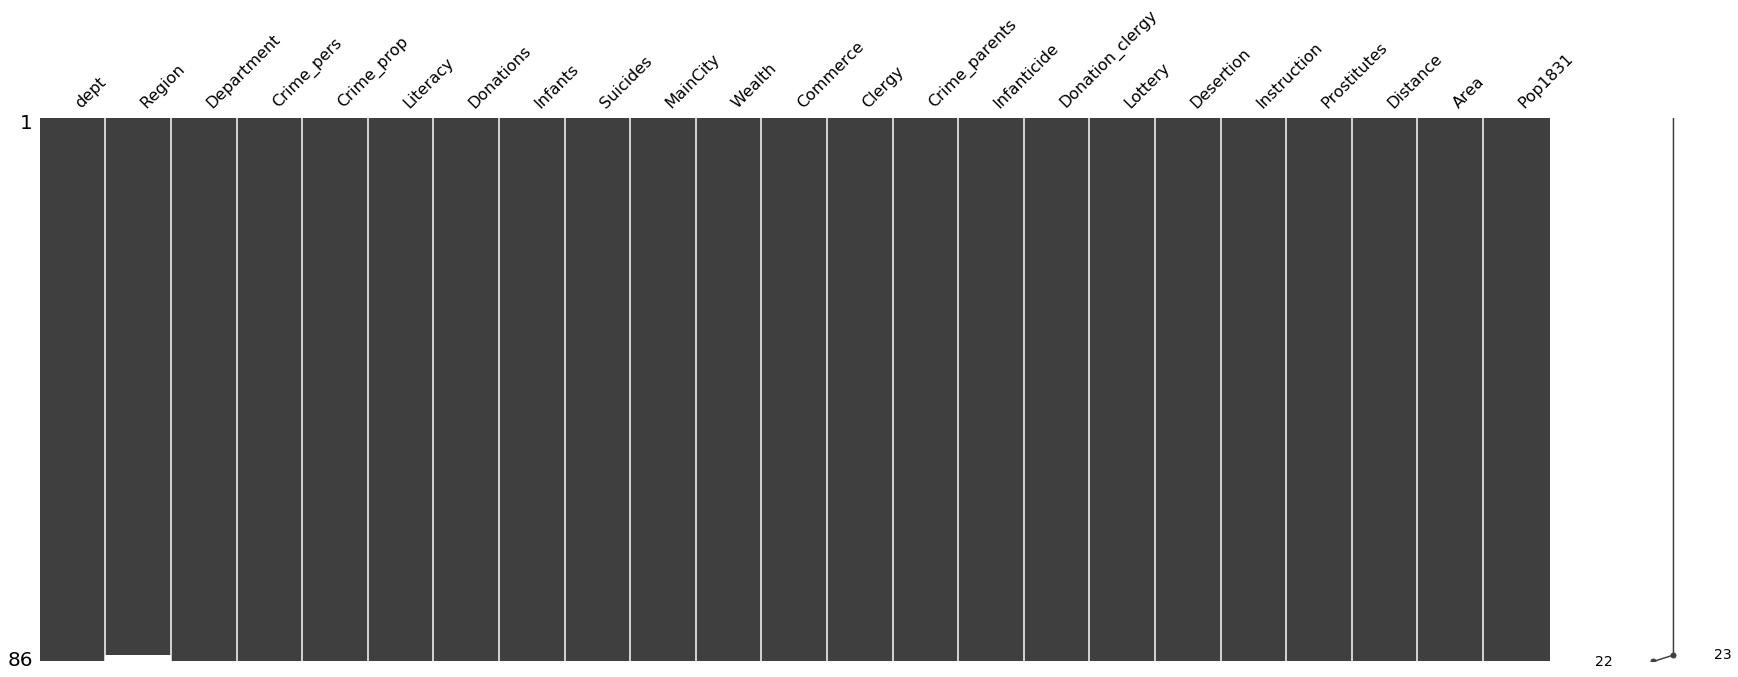

In [20]:
import missingno
missingno.matrix(df, figsize = (30,10))

In [21]:
df.loc[df.Region.isnull().sum()]

dept                    2
Region                  N
Department          Aisne
Crime_pers          26226
Crime_prop           5521
Literacy               51
Donations            8901
Infants             14572
Suicides            12831
MainCity            2:Med
Wealth                 22
Commerce               10
Clergy                 82
Crime_parents           4
Infanticide            82
Donation_clergy        36
Lottery                38
Desertion              82
Instruction            24
Prostitutes           327
Distance           65.945
Area                 7369
Pop1831               513
Name: 1, dtype: object

It is only one so, we may simply drop it. Also it is categorical variable so, using mean or zero values won't work

In [22]:
df=df.dropna(subset=['Region'],how='any')

In [23]:
df.isnull().sum()

dept               0
Region             0
Department         0
Crime_pers         0
Crime_prop         0
Literacy           0
Donations          0
Infants            0
Suicides           0
MainCity           0
Wealth             0
Commerce           0
Clergy             0
Crime_parents      0
Infanticide        0
Donation_clergy    0
Lottery            0
Desertion          0
Instruction        0
Prostitutes        0
Distance           0
Area               0
Pop1831            0
dtype: int64

### 3.7)- Duplicate values

In [24]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
Length: 85, dtype: bool

In [25]:
df.duplicated().sum()

0

### 3.8)-Finding Outliers

In [26]:
df.describe()

,dept,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.00000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,45.082353,19960.941176,7881.341176,39.141176,6723.317647,18982.929412,36516.80000,43.576471,42.329412,43.929412,43.058824,44.000000,43.023529,43.035294,43.905882,43.341176,143.529412,204.055965,6117.188235,380.784235
std,25.580969,7299.241801,3048.615285,17.434335,4863.244310,8850.552556,31498.31879,25.108041,24.787376,24.713014,24.778713,24.679373,24.721774,24.741255,24.831155,24.867531,523.833047,103.786341,1378.799189,148.303198
min,1.000000,5883.000000,1368.000000,12.000000,1246.000000,2660.000000,3460.00000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,762.000000,129.100000
25%,24.000000,14790.000000,5990.000000,25.000000,3446.000000,14281.000000,15400.00000,22.000000,21.000000,23.000000,22.000000,23.000000,22.000000,22.000000,23.000000,23.000000,6.000000,119.718000,5361.000000,283.830000
50%,45.000000,18785.000000,7624.000000,38.000000,4964.000000,17044.000000,26198.00000,44.000000,42.000000,44.000000,43.000000,44.000000,43.000000,43.000000,44.000000,42.000000,34.000000,199.167000,6040.000000,346.300000
75%,66.000000,26221.000000,9190.000000,52.000000,9242.000000,21981.000000,45180.00000,65.000000,63.000000,65.000000,64.000000,65.000000,64.000000,64.000000,65.000000,65.000000,117.000000,283.810000,6815.000000,445.250000
max,89.000000,37014.000000,20235.000000,74.000000,27830.000000,62486.000000,163241.00000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,4744.000000,403.445000,10000.000000,989.940000


In [27]:
def _zoom_3sigma(col, dataset, dataset_apl):
    '''
    col: Data column name
    dataset: The original data table is used to calculate about 3 sigma
    dataset_apl: New data table applies about 3 sigma taken from the dataset..
    '''
    xs = dataset[col]
    mu = xs.mean()
    sigma = xs.std()
    low =  mu - 3*sigma
#     low =  0 if low < 0 else low
    high = mu + 3*sigma
    
    def _value(x):
        if x < low: return low
        elif x > high: return high
        else: return x
    xapl = dataset_apl[col]    
    xnew = list(map(lambda x: _value(x), xapl))
    n_low = len([i for i in xnew if i == low])
    n_high = len([i for i in xnew if i == high])
    n = len(xapl)
    print('Percentage of low: {:.2f}{}'.format(100*n_low/n, '%'))
    print('Percentage of high: {:.2f}{}'.format(100*n_high/n, '%'))
    print('Low value: {:.2f}'.format(low))
    print('High value: {:.2f}'.format(high))
    return xnew

# Check with FLAG_MOBIL variable
x = _zoom_3sigma('Lottery', df, df)

Percentage of low: 0.00%
Percentage of high: 0.00%
Low value: -31.19
High value: 117.26


# 4)- Working with dependant variable

### 4.1)- Histogram

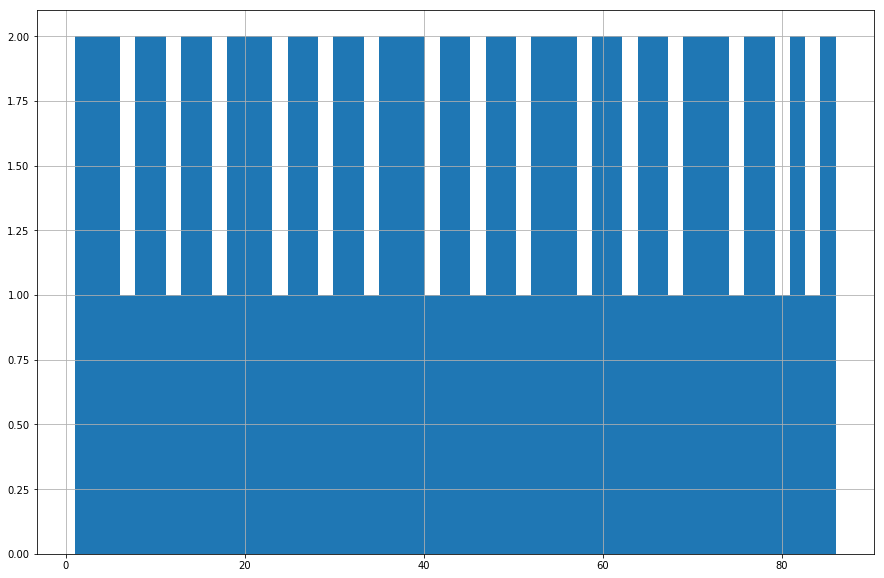

In [28]:
df.Lottery.hist(bins=50,figsize=(15,10))

### 4.2)- dist plot


 mu = 43.04 and sigma = 24.60



Text(0.5, 1.0, 'Lottery value distribution')

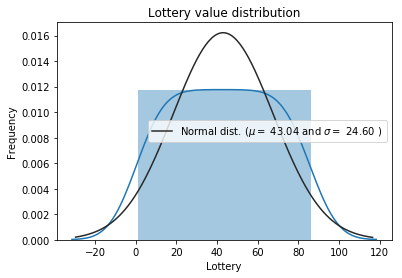

In [29]:
from scipy.stats import norm, skew
sns.distplot(df['Lottery'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Lottery'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Lottery value distribution')

### 4.3)-Density plot to check outliers

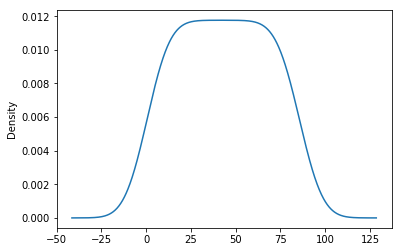

In [30]:
df.Lottery.plot(kind='density')

### 4.4)-Boxplot for outlier check

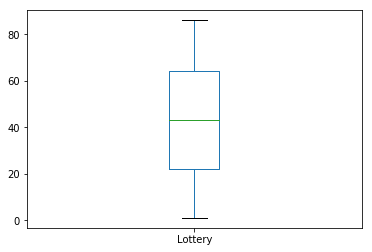

In [31]:
df.Lottery.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [32]:
#correlations with the label feature and sort
correlations = df.corr()['Lottery'].sort_values()

In [33]:
print('Most Positive Correlations:\n', correlations.tail(5))

Most Positive Correlations:
 Commerce      0.432867
Crime_prop    0.464390
Wealth        0.493133
Suicides      0.497224
Lottery       1.000000
Name: Lottery, dtype: float64


In [34]:
print('\nMost Negative Correlations:\n', correlations.head(5))


Most Negative Correlations:
 Pop1831       -0.456234
Literacy      -0.381734
Infanticide   -0.325656
Desertion     -0.284440
Prostitutes   -0.283694
Name: Lottery, dtype: float64


# 5)- Building OLS Modeling

First for only two independent variable i.e Literacy and pop1831

### 5.1)- Scatter plot between Lottery and Literacy

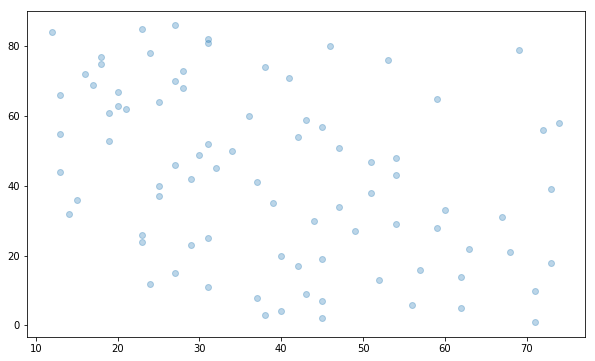

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(y=df['Lottery'],x=df['Literacy'],alpha=0.3)

### 5.2)- Scatter plot between Lottery and pop1831

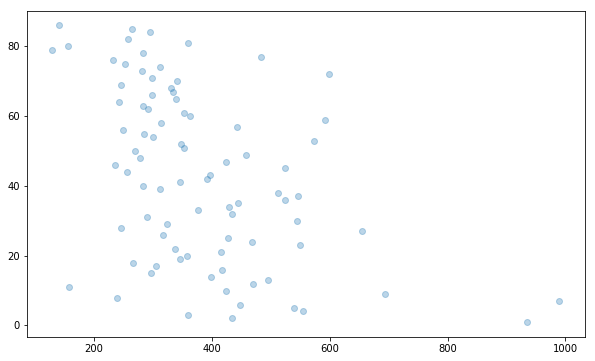

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(y=df['Lottery'],x=df['Pop1831'],alpha=0.3)

Some outlier values are seen at the end

### 5.3)-Pairplot

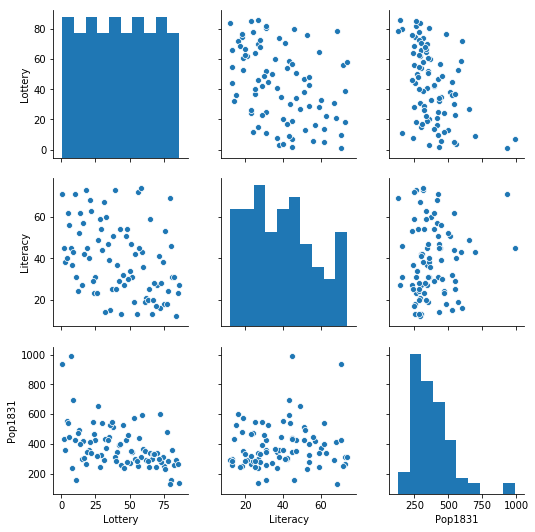

In [37]:
#using seaborn now for pairplot
sns.pairplot(df[['Lottery','Literacy','Pop1831']])

**Right at the end of pop1831 , we can find few outlier patterns. We will minimize that by taking "log"**

In [38]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=df).fit()

In [39]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     21.30
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.54e-08
Time:                        11:12:51   Log-Likelihood:                -375.04
No. Observations:                  85   AIC:                             756.1
Df Residuals:                      82   BIC:                             763.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         238.3807     35.636     

Both Literacy and Pop1831 are significant variables and they effect Lottery winning with a negative pattern

# 6)- Let's apply a GLM 


Gamma for proportional count response

In [40]:
# loading dataset
data = sm.datasets.scotland.load_pandas()

In [41]:
print(sm.datasets.scotland.DESCRLONG)


This data is based on the example in Gill and describes the proportion of
voters who voted Yes to grant the Scottish Parliament taxation powers.
The data are divided into 32 council districts.  This example's explanatory
variables include the amount of council tax collected in pounds sterling as
of April 1997 per two adults before adjustments, the female percentage of
total claims for unemployment benefits as of January, 1998, the standardized
mortality rate (UK is 100), the percentage of labor force participation,
regional GDP, the percentage of children aged 5 to 15, and an interaction term
between female unemployment and the council tax.

The original source files and variable information are included in
/scotland/src/



In [42]:
scotland=data.data

In [43]:
scotland.head()

,YES,COUTAX,UNEMPF,MOR,ACT,GDP,AGE,COUTAX_FEMALEUNEMP
0,60.3,712.0,21.0,105.0,82.4,13566.0,12.3,14952.0
1,52.3,643.0,26.5,97.0,80.2,13566.0,15.3,17039.5
2,53.4,679.0,28.3,113.0,86.3,9611.0,13.9,19215.7
3,57.0,801.0,27.1,109.0,80.4,9483.0,13.6,21707.1
4,68.7,753.0,22.0,115.0,64.7,9265.0,14.6,16566.0


In [44]:
scotland.shape

(32, 8)

**"YES" being our dependant variable aka endogeneous variable**

### 6.1)-add a constant to the exogenous (independent) variables

In [45]:
data.exog = sm.add_constant(data.exog)

In [46]:
scotland=data.data

In [47]:
scotland.head()

,YES,COUTAX,UNEMPF,MOR,ACT,GDP,AGE,COUTAX_FEMALEUNEMP
0,60.3,712.0,21.0,105.0,82.4,13566.0,12.3,14952.0
1,52.3,643.0,26.5,97.0,80.2,13566.0,15.3,17039.5
2,53.4,679.0,28.3,113.0,86.3,9611.0,13.9,19215.7
3,57.0,801.0,27.1,109.0,80.4,9483.0,13.6,21707.1
4,68.7,753.0,22.0,115.0,64.7,9265.0,14.6,16566.0


In [48]:
scotland.shape

(32, 8)

### 6.2)- Fit model

Instantiate a gamma family model with the default link function.

In [49]:
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())

C:\Users\Hassan\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


In [50]:
gamma_results = gamma_model.fit()

In [51]:
print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                       0.0035843
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Sun, 25 Aug 2019   Deviance:                     0.087389
Time:                        11:12:53   Pearson chi2:                   0.0860
No. Iterations:                     6   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0178      0.011     -1.548      0.122      -0.040       0.005
COUTAX              4.962e-0

# Families


The distribution families currently implemented are <br>

- Family............. The parent class for one-parameter exponential families.

- Binomial...............Binomial exponential family distribution.

- Gamma..............Gamma exponential family distribution.

- Gaussian...........Gaussian exponential family distribution.

- InverseGaussian............. InverseGaussian exponential family.

- NegativeBinomial........... Negative Binomial exponential family.

- Poisson...........Poisson exponential family.

- Tweedie.........Tweedie family.

# 7)- More on GLM

Binomial response data

### 7.1)- Loading data

Star98 dataset which was taken with permission from Jeff Gill (2000) Generalized linear models: A unified approach.

In [52]:
# Trying new problem.....new dataset
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

In [62]:
data = sm.datasets.star98.load_pandas()

In [63]:
type(data)

statsmodels.datasets.utils.Dataset

### 7.2)-Working with dataframe

In [64]:
data=data.data
data.shape

(303, 22)

In [65]:
data.head()

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,...,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,...,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,...,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,...,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,...,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


**The dependent variable is N by 2 (Success: NABOVE, Failure: NBELOW)**

In [66]:
y=data[['NABOVE','NBELOW']]

In [67]:
y[:5]

,NABOVE,NBELOW
0,452.0,355.0
1,144.0,40.0
2,337.0,234.0
3,395.0,178.0
4,8.0,57.0


In [68]:
data.head()

,NABOVE,NBELOW,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,452.0,355.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,...,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,144.0,40.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,...,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,337.0,234.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,...,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,395.0,178.0,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,...,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,8.0,57.0,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,...,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


In [69]:
X=data.drop(['NABOVE','NBELOW'], axis=1)

In [70]:
X[:5]

,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,21.71025,57.03276,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,20.44278,64.62264,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,18.95419,53.94191,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,21.63539,49.06103,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,18.77984,52.38095,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


### 7.3)-Normalize data

In [71]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [72]:
X_scaled

array([[-0.34319004,  1.97680718,  0.97920574, ...,  1.39452818,
         0.1073676 ,  1.40735287],
       [-1.17673409,  2.66165191,  0.29587396, ...,  1.63001633,
         0.0395062 ,  2.3131254 ],
       [-0.42903237,  0.37826129,  4.18736095, ...,  0.78138954,
         1.09657778,  1.47076048],
       ...,
       [ 0.09809539, -0.25532493, -0.46641291, ..., -0.19499878,
         0.33822502, -0.39423664],
       [ 1.42957153,  1.65448574, -0.30149664, ..., -1.05308762,
        -0.11118214, -1.08777319],
       [ 1.7783726 ,  0.01165023,  0.44862622, ..., -0.78455078,
        -0.3324623 ,  0.00936736]])

### 7.4)- Fit the model

In [73]:
glm_binom = sm.GLM(y, X, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['NABOVE', 'NBELOW']   No. Observations:                  303
Model:                              GLM   Df Residuals:                      283
Model Family:                  Binomial   Df Model:                           19
Link Function:                    logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -3000.5
Date:                  Sun, 25 Aug 2019   Deviance:                       4082.4
Time:                          11:15:25   Pearson chi2:                 4.05e+03
No. Iterations:                       5   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
LOWINC                     -0.0169      0.000    -39.491      0.000      -0.018      -0

### 7.4)-Intercept term
We cannot find intercept term in this example. Let's try that

In [74]:
data = sm.datasets.star98.load_pandas()

In [75]:
# add intercept term i.e constant
data.exog = sm.add_constant(data.exog)

**The dependent variable is N by 2 (Success: NABOVE, Failure: NBELOW) also known as endogenous**

In [76]:
data.exog.loc[:2,:]

,const,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,...,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,1.0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,21.71025,...,0.0,22.22222,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,1.0,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,20.44278,...,0.0,0.00000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,1.0,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,18.95419,...,0.0,0.00000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777


In [77]:
print(data.endog.loc[:5,:])

   NABOVE  NBELOW
0   452.0   355.0
1   144.0    40.0
2   337.0   234.0
3   395.0   178.0
4     8.0    57.0
5  1348.0   899.0


In [78]:
#Fit and summary

glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['NABOVE', 'NBELOW']   No. Observations:                  303
Model:                              GLM   Df Residuals:                      282
Model Family:                  Binomial   Df Model:                           20
Link Function:                    logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -2998.6
Date:                  Sun, 25 Aug 2019   Deviance:                       4078.8
Time:                          11:15:28   Pearson chi2:                 4.05e+03
No. Iterations:                       5   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.9589      1.547      1.913      0.056      -0.073       5

**Results of both approaches are same. Only difference is that we did not consider intercept term. It is very important as in stats it is taken as bias term.**

# 8)- Results

Quantities of interest

In [79]:
print('Total number of trials:',  data.endog.loc[0].sum())

Total number of trials: 807.0


In [80]:
print('Parameters: ', res.params)

Parameters:  const                      2.958878
LOWINC                    -0.016815
PERASIAN                   0.009925
PERBLACK                  -0.018724
PERHISP                   -0.014239
PERMINTE                   0.254487
AVYRSEXP                   0.240694
AVSALK                     0.080409
PERSPENK                  -1.952161
PTRATIO                   -0.334086
PCTAF                     -0.169022
PCTCHRT                    0.004917
PCTYRRND                  -0.003580
PERMINTE_AVYRSEXP         -0.014077
PERMINTE_AVSAL            -0.004005
AVYRSEXP_AVSAL            -0.003906
PERSPEN_PTRATIO            0.091714
PERSPEN_PCTAF              0.048990
PTRATIO_PCTAF              0.008041
PERMINTE_AVYRSEXP_AVSAL    0.000222
PERSPEN_PTRATIO_PCTAF     -0.002249
dtype: float64


In [81]:
print('T-values: ', res.tvalues)

T-values:  const                       1.913012
LOWINC                    -38.749083
PERASIAN                   16.504736
PERBLACK                  -25.182189
PERHISP                   -32.817913
PERMINTE                    8.498271
AVYRSEXP                    4.212479
AVSALK                      5.774998
PERSPENK                   -6.161911
PTRATIO                    -5.453217
PCTAF                      -5.168654
PCTCHRT                     3.921200
PCTYRRND                  -15.878260
PERMINTE_AVYRSEXP          -7.390931
PERMINTE_AVSAL             -8.449639
AVYRSEXP_AVSAL             -4.059162
PERSPEN_PTRATIO             6.321099
PERSPEN_PCTAF               6.574347
PTRATIO_PCTAF               5.362290
PERMINTE_AVYRSEXP_AVSAL     7.428064
PERSPEN_PTRATIO_PCTAF      -6.445137
dtype: float64


In [82]:
print('p-values: ', res.pvalues)

p-values:  const                       5.574657e-02
LOWINC                      0.000000e+00
PERASIAN                    3.392118e-61
PERBLACK                   6.278195e-140
PERHISP                    3.269641e-236
PERMINTE                    1.924352e-17
AVYRSEXP                    2.525829e-05
AVSALK                      7.695418e-09
PERSPENK                    7.187234e-10
PTRATIO                     4.946672e-08
PCTAF                       2.357854e-07
PCTCHRT                     8.810923e-05
PCTYRRND                    8.963046e-57
PERMINTE_AVYRSEXP           1.458047e-13
PERMINTE_AVSAL              2.922053e-17
AVYRSEXP_AVSAL              4.924904e-05
PERSPEN_PTRATIO             2.597101e-10
PERSPEN_PCTAF               4.886728e-11
PTRATIO_PCTAF               8.217327e-08
PERMINTE_AVYRSEXP_AVSAL     1.101990e-13
PERSPEN_PTRATIO_PCTAF       1.154961e-10
dtype: float64


# 9)- Visualization of results

Plots

In [83]:
data.endog.sum(1)

0       807.0
1       184.0
2       571.0
3       573.0
4        65.0
5      2247.0
6      1364.0
7       912.0
8       525.0
9      1067.0
10     3016.0
11      235.0
12      556.0
13      688.0
14      252.0
15      925.0
16      377.0
17       69.0
18     1092.0
19      115.0
20      139.0
21      449.0
22      309.0
23      116.0
24       81.0
25       66.0
26     1259.0
27      190.0
28      322.0
29     2394.0
        ...  
273     120.0
274     224.0
275     733.0
276     120.0
277     135.0
278     776.0
279     207.0
280      41.0
281      43.0
282     259.0
283     342.0
284     250.0
285    1750.0
286     150.0
287     134.0
288      53.0
289     266.0
290     304.0
291    1338.0
292    1170.0
293    1431.0
294     248.0
295     516.0
296     591.0
297      59.0
298     342.0
299     154.0
300     595.0
301     709.0
302     156.0
Length: 303, dtype: float64

In [84]:
data.endog.iloc[:, 0]

0       452.0
1       144.0
2       337.0
3       395.0
4         8.0
5      1348.0
6       477.0
7       565.0
8       205.0
9       469.0
10      784.0
11      209.0
12      195.0
13      206.0
14      136.0
15      694.0
16      204.0
17       31.0
18      601.0
19       64.0
20       51.0
21      220.0
22      151.0
23       36.0
24       15.0
25        5.0
26      541.0
27       86.0
28      142.0
29     1365.0
        ...  
273      55.0
274      72.0
275     359.0
276      31.0
277      39.0
278     303.0
279      79.0
280      19.0
281      23.0
282      91.0
283      96.0
284      40.0
285     578.0
286      26.0
287      23.0
288      31.0
289      59.0
290     204.0
291     736.0
292     526.0
293    1088.0
294     186.0
295     284.0
296     455.0
297      17.0
298      96.0
299      37.0
300     208.0
301     199.0
302      72.0
Name: NABOVE, Length: 303, dtype: float64

In [85]:
nobs = res.nobs
y = data.endog.iloc[:,0]/data.endog.sum(1)

In [86]:
y[:5]

0    0.560099
1    0.782609
2    0.590193
3    0.689354
4    0.123077
dtype: float64

In [87]:
yhat = res.mu

### 9a)-Plot yhat vs y

In [88]:
from statsmodels.graphics.api import abline_plot

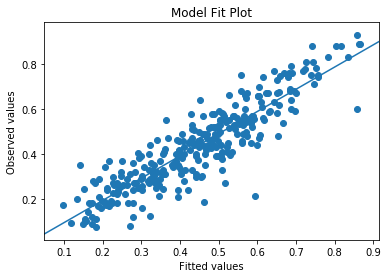

In [89]:
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

### 9b)-Plot yhat vs. Pearson residuals

Text(0.5, 0, 'Fitted values')

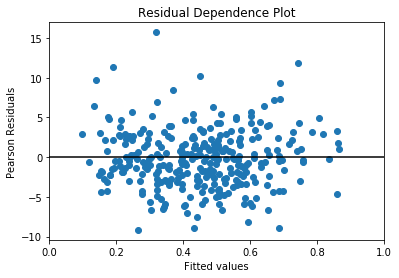

In [90]:
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

### 9c)-Histogram of standardized deviance residuals

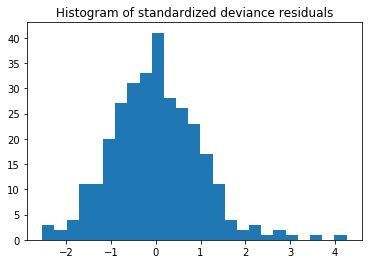

In [91]:
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

### 9d)-QQ Plot of Deviance Residuals

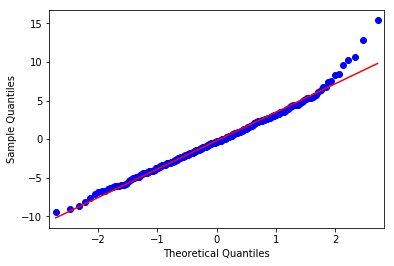

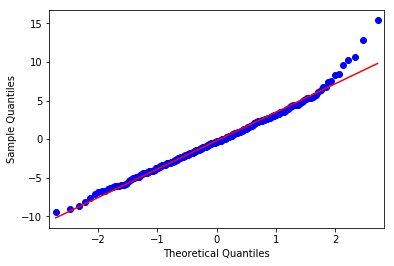

In [92]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')